<a href="https://colab.research.google.com/github/shamik127/SolarFlare-ML/blob/master/Baysian_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Likelihood of Theta for New Campaign')

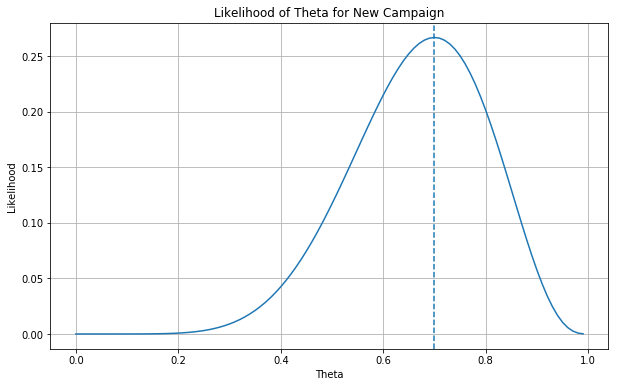

In [0]:
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)


def likelihood(theta, n, x):
  return (factorial(n) / (factorial(x) * factorial(n-x))) * (theta ** x) \
          * ((1 - theta) ** (n - x))

n_clicks = 7.
n_impressions = 10.

ctr = n_clicks / n_impressions

possible_theta_values = list(map(lambda x: x/100., range(100)))


likelihoods = map(lambda theta: likelihood(theta, n_impressions, n_clicks)\
                                , possible_theta_values)

a = [L for L in likelihoods]


mle = possible_theta_values[np.argmax(a)]

f, ax = plt.subplots(1)
ax.plot(possible_theta_values, a)
ax.axvline(mle, linestyle = "--")
ax.set_xlabel("Theta")
ax.set_ylabel("Likelihood")
ax.grid()
ax.set_title("Likelihood of Theta for New Campaign")


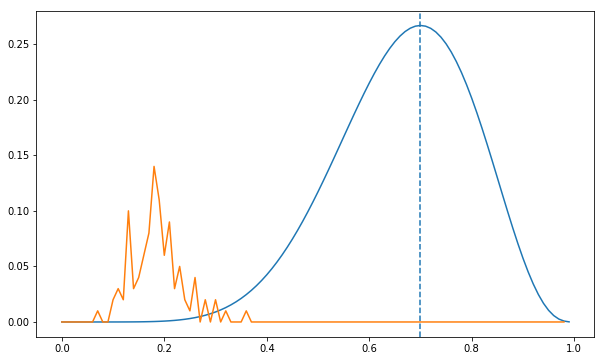

In [0]:
p = np.random.beta(11.5, 48.5, 100)
impressions = np.random.randint(1, 10000, 100)
clicks = np.random.binomial(impressions, p)
click_through_rates = clicks / impressions
zero_to_one = list(map(lambda x: x/100., range(100)))
counts, bins = np.histogram(click_through_rates, bins = zero_to_one)
counts = counts / 100
_, ax = plt.subplots(1)
ax.axvline(mle, linestyle='--')
ax.plot(possible_theta_values, a)
ax.plot(bins[:-1], counts)
plt.show()

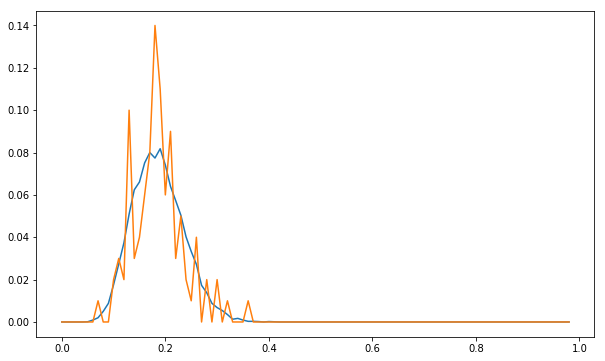

In [0]:
# fit beta to previous click through rates

from scipy.stats import beta

prior_parameters = beta.fit(click_through_rates, floc = 0, fscale = 1)

prior_a, prior_b = prior_parameters[0:2]
prior_distribution = beta(prior_a, prior_b)

prior_samples = prior_distribution.rvs(10000)

fit_counts, bins = np.histogram(prior_samples, zero_to_one)

#normalize histogram

fit_counts = list(map(lambda x:float(x)/fit_counts.sum(), fit_counts))

f, ax = plt.subplots(1)
plt.plot(bins[:-1], fit_counts)

hist_ctr, bins = np.histogram(click_through_rates, zero_to_one)
hist_ctr = list(map(lambda x: float(x)/hist_ctr.sum(), hist_ctr))

plt.plot(bins[:-1], hist_ctr)

In [1]:
import scipy
scipy.__version__

'1.3.1'

In [2]:
pip install scipy==1.2.0

     |████████████████████████████████| 26.6MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1


In [0]:
import pymc3 as pm
import numpy as np

#create our data:clicks = np.array([n_clicks])
#clicks represents our successes. We observed 7 clicks.impressions = np.array([n_impressions])
#this represents the number of trials. There were 10 impressions.

with pm.Model() as model:
#sets a context; all code in block "belongs" to the model object

    theta_prior = pm.Beta('prior', 11.5, 48.5)
    #our prior distribution, Beta (11.5, 48.5)
    observations = pm.Binomial('obs',n = impressions
                               , p = theta_prior
                               , observed = clicks)     #Sampling distribition of outcomes in the dataset.
    #our prior p_prior will be updated with data


    start = pm.find_MAP()    #find good starting values for the sampling algorithm
    #Max Aposterior values, or values that are most likely

    step = pm.NUTS(state=start)     #Choose a particular MCMC algorithm     #we'll choose NUTS, the No U-Turn Sampler (Hamiltonian)

    trace = pm.sample(5000
                      , step
                      , start=start
                      , progressbar=True)               #obtain samples

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -3,214.6, ||grad|| = 1,474: 100%|██████████| 6/6 [00:00<00:00, 605.11it/s]


{'prior_logodds__': array(-1.45812878), 'prior': array(0.18875369)}
